<a href="https://colab.research.google.com/github/62wyp/Assignment/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Consumption Analysis Tool

## Background

As Junior Data Analysts at EcoSolutions, we are challenged to improve the energy efficiency of our homes and businesses. Our goal was to develop a Python application that could help users track and analyze their energy consumption data. With this tool, users can better understand their energy usage patterns and find ways to conserve energy and lower their utility bills.

## Functionality Overview

Our application will have the following features:

1. data entry and storage: users can enter energy consumption data for each month of the year, including electricity, gas and water usage, and store the data in a CSV file.
2. Data analysis and visualization: the user can choose from at least three analysis options to visualize the data using graphs. The analysis options include monthly consumption trends, comparison of energy types by consumption and breakdown of total annual consumption by energy type.

# Data entry and storage

Our application firstly provides a user-friendly interactive interface to assist users to enter monthly energy consumption information, including electricity (in kWh), gas consumption (measured in cubic decimeters) and water consumption (measured in liters). Once the data is collected, it is saved in CSV format for later analysis and presentation.

In [2]:

import matplotlib.pyplot as plt
import csv # import csv library
# data entered and saved to CSV
def input_and_save_data_to_csv():
  with open('consume_energy.csv', mode='w', newline='')as file:
      writer = csv.writer(file)

      writer.writerow(['Month','Electricity', 'Gas', 'Water'])
      #prompts the user to enter monthly energy consumption data
      print("Please enter monthly energy consumption data")
      for month in ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]:
          print(f"\n{month}:")
          electricity = input("Electricity usage(kWh):")
          gas = input("Gas usage(cubic meters):")
          water = input("Water usage(liters):")
          #write user input data to csv file
          writer.writerow([month,electricity,gas,water])
      #prompts that data entry is complete and has been saved to csv
      print("\nData entryis complete and has been saved to CSV.")

input_and_save_data_to_csv()



Please enter monthly energy consumption data

Jan:
Electricity usage(kWh):537
Gas usage(cubic meters):263
Water usage(liters):826

Feb:
Electricity usage(kWh):521
Gas usage(cubic meters):293
Water usage(liters):893

Mar:
Electricity usage(kWh):593
Gas usage(cubic meters):297
Water usage(liters):852

Apr:
Electricity usage(kWh):529
Gas usage(cubic meters):264
Water usage(liters):845

May:
Electricity usage(kWh):519
Gas usage(cubic meters):260
Water usage(liters):840

Jun:
Electricity usage(kWh):592
Gas usage(cubic meters):240
Water usage(liters):814

Jul:
Electricity usage(kWh):510
Gas usage(cubic meters):293
Water usage(liters):816

Aug:
Electricity usage(kWh):502
Gas usage(cubic meters):277
Water usage(liters):892

Sept:
Electricity usage(kWh):581
Gas usage(cubic meters):263
Water usage(liters):875

Oct:
Electricity usage(kWh):520
Gas usage(cubic meters):293
Water usage(liters):892

Nov:
Electricity usage(kWh):510
Gas usage(cubic meters):243
Water usage(liters):826

Dec:
Electricity u

### Data analysis and visualization services
We provide three main analysis options for users to choose:
1. Monthly Energy Consumption Tracking: Visualize the monthly consumption trend of each energy species, making it easy to observe the dynamic change of energy consumption and grasp the change pattern of peaks and valleys and seasons.
2. Comparative analysis of energy consumption: Through comparative analysis of the consumption of various energy sources (electricity, gas, water, etc.), it reveals the difference in the ratio between energy types and finds the best way to save energy.
3. Energy classification statistics: Accurately record the proportion of total consumption of each energy species, so as to accurately assess the role of various energy sources in the overall energy consumption and focus on the most influential energy sources.


Select an option:
1. Monthly Trends
2. Comparison of Energy Consumption by Type
3. Total Consumption Breakdown by Energy Type
Enter your choice (1/2/3): 3


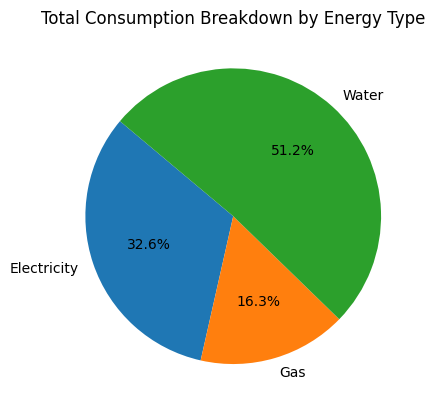

In [21]:
# reading data from a CSV file
def read_data_from_csv():
  energy_data = {} #creating empty dictionary to store energy data
  #open csv file in read mode
  with open('consume_energy.csv', mode='r') as file:
    reader = csv.DictReader(file) #creat csv dictionary reading objects
    #literate over each line of the csv file
    for row in reader:
      month = row['Month'] #get month information
      #monthly energy data saved to dictionary
      energy_data[month] = {
                'Electricity': float(row['Electricity']),
                'Gas': float(row['Gas']),
                'Water': float(row['Water'])
            }
  return energy_data

#mapping of monthly consumption trends
def plot_monthly_consumption_trends(data):
    months = list(data.keys()) # extract month list
    #extract data on each energy consumption
    electricity = [data[month]['Electricity'] for month in months]
    gas = [data[month]['Gas'] for month in months]
    water = [data[month]['Water'] for month in months]

    #plot line graphs to show monthly consumption trends
    plt.plot(months, electricity, label='Electricity')
    plt.plot(months, gas, label='Gas')
    plt.plot(months, water, label='Water')
    plt.title('Monthly Trends') #set the chart title
    plt.xlabel('Month')
    plt.ylabel('Usage')
    plt.show()

#comparing consumption of different energy types
def compare_energy_types(data):
    energy_types = ['Electricity', 'Gas', 'Water'] #define a list of energy types
    #calculate total annual consumption of each energy source
    total_usage = {energy: sum(data[month][energy]for month in data)for energy in energy_types}

    #bar graphs to compare consumption of different energy types
    plt.bar(total_usage.keys(), total_usage.values(), color=['blue', 'red', 'yellow'])
    plt.title('Comparison of Energy Consumption by Type')
    plt.xlabel('Energy Type')
    plt.ylabel('Total Usage')
    plt.show()

#mapping the decomposition of total consumption
def plot_consumption_breakdown(data):
    energy_types = ['Electricity', 'Gas', 'Water']
    total_usage = [sum(data[month][energy] for month in data) for energy in energy_types]

    #pie charts to show the breakdown of total consumption
    plt.pie(total_usage, labels=energy_types, autopct='%1.1f%%',startangle=140)
    plt.title('Total Consumption Breakdown by Energy Type')
    plt.show()

#interface for user-selected options
def main_menu():
    energy_data = read_data_from_csv()

    #provide options for users to choose
    print("\nSelect an option:")
    print("1. Monthly Trends")
    print("2. Comparison of Energy Consumption by Type")
    print("3. Total Consumption Breakdown by Energy Type")
    choice = input("Enter your choice (1/2/3): ")

    #call the appropriate function for data analysis and visualization according to the user's choice
    if choice == '1':
        plot_monthly_consumption_trends(energy_data)
    elif choice == '2':
        compare_energy_types(energy_data)
    elif choice == '3':
        plot_consumption_breakdown(energy_data)
    else:
        print("Invalid choice. Please enter 1, 2, or 3.")

main_menu()

# Conclusion

The energy consumption analysis tool we have developed gives users insight into their energy usage, allowing them to make science-based decisions about saving energy and reducing utility costs. The tool is easy to use and provides intuitive data visualization to help users make informed energy management decisions.

##Reflection and Learning


For my code assignment, I attempted to use what I learned to create a program that would automatically collect, store, and analyze energy consumption data. Although I still have a lot to learn in this area, through this project I learned how to use the Python programming language to work with file manipulation and CSV data. I also attempted to create a simple user interface that allowed the user to select different options for analysis. Although this interface was very basic, I realized that user-friendly interface design is crucial to improve the ease of use of the program. Finally, I attempted some basic analysis and visualization of the collected energy consumption data using the matplotlib library. Although my data analysis and visualization skills still need to be improved, this project has provided me with a good learning opportunity to apply my theoretical knowledge to real projects. I will continue to study hard to improve my skills and apply what I have learned to future projects.